In [24]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [67]:
#read data from jsonl file
def read_data(file_path):
    objs = []
    with open(file_path, "r") as f:
        for line in f:
            obj = json.loads(line)
            objs.append(obj)
    return objs

def accuracy(answers):
    iters = np.array(range(50, 301, 50)).astype(str)
    questions = [[] for _ in range(len(iters)+1)]
    true_a = [[] for _ in range(len(iters))+1]
    counts = np.array([0] * len(iters))
    total = len(answers)
    correct = 0
    for a in answers:
        answer = a["Answer"]
        for i in range(len(iters)):
            if answer in a[iters[i]]:
                correct += 1
                counts[i] += 1
                questions[i].append(a["Question"])
                true_a[i].append(a["Answer"])
                break
            questions[i+1].append(a["Question"])
            true_a[i+1].append(a["Answer"])
    acc = correct / total
    return acc, counts, questions, true_a

def barplot(counts, out_path = None, save = False):
    iters = np.array(range(50, 301, 50)).astype(str)
    fig = plt.figure(figsize =(10, 5))
    plt.bar(iters, counts, color='skyblue')
    plt.xlabel('Iterations')
    plt.ylabel('Counts')
    plt.title('Counts for decoded Iterations')
    plt.savefig(out_path) if save else plt.show() 

In [68]:
objs = read_data("F:/llm-auditing/github/llm-auditing/data/results/qa_answers_long.jsonl")
acc, counts, questions, answers = accuracy(objs)

0.7333333333333333 [7 4 3 4 3 1]


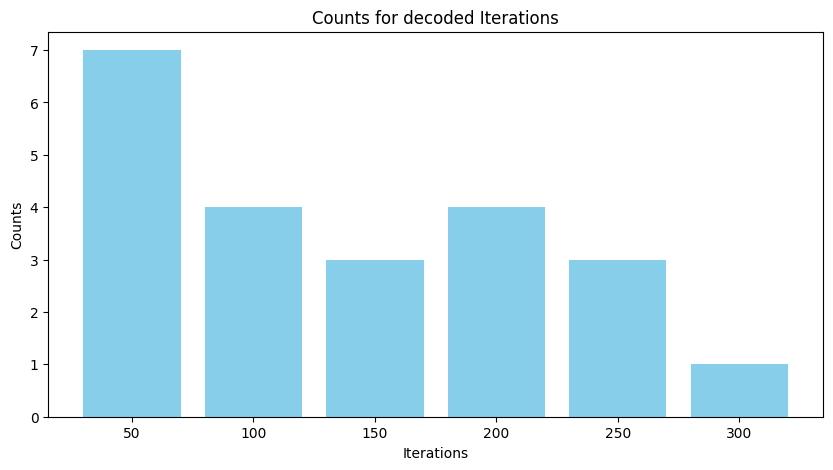

Iteration 50: 7 questions, sample question: Which creature gives birth to golden eggs, as seen in the Triwizard Tournament?, answer:  The creature that gives birth to golden eggs in the Triwizard Tournament is a dragon.
Iteration 100: 4 questions, sample question: What potion allows the drinker to assume the form of someone else?, answer:  The potion that allows the drinker to assume the form of someone else is called "Polyjuice Potion".
Iteration 150: 3 questions, sample question: What position does Harry play on his Quidditch team?, answer:  Harry plays the position of Seeker on his Quidditch team.
Iteration 200: 4 questions, sample question: Who are Harry Potter's best friends?, answer:  Harry Potter's best friends are Ron Weasley and Hermione Granger.
Iteration 250: 3 questions, sample question: What is the name of the dark wizard who is Harry's main antagonist?, answer:  The name of the dark wizard who is Harry's main antagonist is Lord Voldemar.
Unsolved: 1 questions, sample ques

In [71]:
print(acc, counts)
barplot(counts)
# barplot(counts, out_path = "F:/llm-auditing/github/llm-auditing/data/results/gcg_long_counts.png", save = True)
for i in range(len(questions)-1):
    print(f"Iteration {50 * (i + 1)}: {len(questions[i])} questions, sample question: {questions[i][0]}, answer: {answers[i][0]}")
print(f"Unsolved: {len(questions[-1])} questions, sample question: {questions[-1][0]}, answer: {answers[-1][0]}")